#How to build a Single Neuron Regression Model using Tensorflow from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df=df.drop(["Unnamed: 0"],axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["color"]=le.fit_transform(df["color"])
df["cut"]=le.fit_transform(df["cut"])
df["clarity"]=le.fit_transform(df["clarity"])

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [7]:
from sklearn.preprocessing import StandardScaler
for col in df:
  sc=StandardScaler()
  df[col]=sc.fit_transform(df[[col]])

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [9]:
x=df.drop(["price"],axis=1)

In [10]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.538099,-1.525021,-1.064117,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53936,-0.164427,-1.511147,-1.525021,-1.064117,0.942753,-1.099672,-0.036690,0.013548,0.100988
53937,-0.206621,1.407998,-1.525021,-1.064117,0.733344,1.137995,-0.063434,-0.047741,0.030135
53938,0.130927,0.434949,0.826413,-0.484264,-0.523105,0.242928,0.373383,0.337506,0.285204


In [11]:
y=df["price"]

In [12]:
y

0       -0.904095
1       -0.904095
2       -0.903844
3       -0.902090
4       -0.901839
           ...   
53935   -0.294731
53936   -0.294731
53937   -0.294731
53938   -0.294731
53939   -0.294731
Name: price, Length: 53940, dtype: float64

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
xtrain.shape

(43152, 9)

In [17]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1, input_dim=9)
])

In [19]:
model.compile(optimizer="sgd",loss="mse")

In [20]:
trained_model=model.fit(xtrain,ytrain,epochs=50,batch_size=10)

Epoch 1/50
4316/4316 [==============================] - 5s 1ms/step - loss: 0.1521
Epoch 2/50
4316/4316 [==============================] - 4s 966us/step - loss: 0.1210
Epoch 3/50
4316/4316 [==============================] - 4s 1ms/step - loss: 0.1208
Epoch 4/50
4316/4316 [==============================] - 4s 939us/step - loss: 0.1193
Epoch 5/50
4316/4316 [==============================] - 4s 923us/step - loss: 0.1189
Epoch 6/50
4316/4316 [==============================] - 4s 907us/step - loss: 0.1186
Epoch 7/50
4316/4316 [==============================] - 4s 947us/step - loss: 0.1192
Epoch 8/50
4316/4316 [==============================] - 4s 980us/step - loss: 0.1187
Epoch 9/50
4316/4316 [==============================] - 5s 1ms/step - loss: 0.1191
Epoch 10/50
4316/4316 [==============================] - 5s 1ms/step - loss: 0.1187
Epoch 11/50
4316/4316 [==============================] - 4s 987us/step - loss: 0.1190
Epoch 12/50
4316/4316 [==============================] - 4s 951us/step 

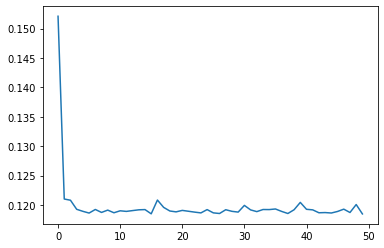

In [21]:
plt.plot(trained_model.history['loss'])

In [22]:
ypred=model.predict(xtest)

In [23]:
ypred

array([[-1.0549474 ],
       [ 0.68992627],
       [-0.21785113],
       ...,
       [-0.18220642],
       [ 0.59439224],
       [-0.64672405]], dtype=float32)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"R squared: {r2_score(ytest,ypred)}")
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:- {np.sqrt(mean_squared_error(ytest,ypred))}")
print(f"MAE:-{mean_absolute_error(ytest,ypred)}")

R squared: 0.885138152755632
MSE:0.11214229950189081
RMSE:- 0.33487654367227754
MAE:-0.21358496322078516
